In [1]:
import pandas as pd
weather = pd.read_csv("data.csv" , index_col="DATE")

In [2]:
weather


,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
2004-02-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",21.03,731.0,214.0,0.00,0.0,0.0,40.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.72,32.0,57.0,0.00,0.0,0.0,38.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.16,1808.0,1807.0,0.01,0.1,0.0,33.0,37.0,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2004-02-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",14.54,1210.0,1504.0,0.00,0.0,0.0,32.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",11.41,943.0,2200.0,0.00,0.0,0.0,35.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",9.17,NaN,NaN,0.00,0.0,0.0,71.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.96,NaN,NaN,0.00,0.0,0.0,76.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.20,NaN,NaN,0.00,0.0,0.0,75.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CLEANING THE DATA

In [8]:
null = weather.isnull()
null.sum()


,0
STATION,0
NAME,0
AWND,30
FMTM,4741
PGTM,4914
PRCP,1
SNOW,1
SNWD,4
TAVG,2800
TMAX,1


In [11]:
#shape of the dataset
weather.shape
#gives output in form (Rows,columns)

(7519, 37)

In [17]:
##Null percentage per rows and columns
null_percentage = weather.isnull().sum()/weather.shape[0]*100
null_percentage
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [18]:
valid_columns = null_percentage[null_percentage<50]
valid_columns

,0
STATION,0.000000
NAME,0.000000
AWND,0.398989
PRCP,0.013300
SNOW,0.013300
SNWD,0.053199
TAVG,37.238995
TMAX,0.013300
TMIN,0.013300
WDF2,0.398989


In [22]:
valid_col = weather.columns[null_pct<0.05]
valid_col

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN',
       'WDF2', 'WDF5', 'WSF2', 'WSF5'],
      dtype='object')

In [25]:
weather = weather[valid_col].copy()
weather
#making the dataset contain only that indexes which has less null percentage than 0.05 / 5 percentage

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
DATE,,,,,,,,,,,,
2004-02-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",21.03,0.00,0.0,0.0,45.0,34.0,310.0,290.0,31.1,40.9
2004-02-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.72,0.00,0.0,0.0,47.0,29.0,310.0,320.0,17.0,19.9
2004-02-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.16,0.01,0.1,0.0,37.0,29.0,350.0,360.0,16.1,19.9
2004-02-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",14.54,0.00,0.0,0.0,42.0,22.0,350.0,350.0,25.9,32.0
2004-02-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",11.41,0.00,0.0,0.0,44.0,26.0,350.0,360.0,17.9,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",9.17,0.00,0.0,0.0,80.0,67.0,20.0,50.0,15.0,21.0
2024-09-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.96,0.00,0.0,0.0,87.0,69.0,30.0,20.0,19.9,27.1
2024-09-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.20,0.00,0.0,0.0,84.0,67.0,350.0,20.0,21.0,32.0


In [27]:
#Addressing the null values
weather.isnull().sum()    #at the point total null values present


#ffill() this is a type of function which fills the null value with its previous
# not null value

weather = weather.ffill()

In [29]:
#now checking the null values

weather.isnull().sum()

# thus the dataset is cleared

,0
STATION,0
NAME,0
AWND,0
PRCP,0
SNOW,0
SNWD,0
TMAX,0
TMIN,0
WDF2,0
WDF5,0


PREPARING THE DATA FOR ML

In [30]:
#checking the datatypes
weather.dtypes    #{ALSO KEEP IN MIND ,  OBJECT = STRING }

,0
STATION,object
NAME,object
AWND,float64
PRCP,float64
SNOW,float64
SNWD,float64
TMAX,float64
TMIN,float64
WDF2,float64
WDF5,float64


In [31]:
weather.index
# here our index is DATE but datatype is object so we need to convert the
# datatype of index to datetime

Index(['2004-02-22', '2004-02-23', '2004-02-24', '2004-02-25', '2004-02-26',
       '2004-02-27', '2004-02-28', '2004-02-29', '2004-03-01', '2004-03-02',
       ...
       '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17',
       '2024-09-18', '2024-09-19', '2024-09-20', '2024-09-21', '2024-09-22'],
      dtype='object', name='DATE', length=7519)

In [33]:
weather.index = pd.to_datetime(weather.index)
weather.index
# Thus the datatype is converted to Date time

DatetimeIndex(['2004-02-22', '2004-02-23', '2004-02-24', '2004-02-25',
               '2004-02-26', '2004-02-27', '2004-02-28', '2004-02-29',
               '2004-03-01', '2004-03-02',
               ...
               '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16',
               '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20',
               '2024-09-21', '2024-09-22'],
              dtype='datetime64[ns]', name='DATE', length=7519, freq=None)

In [36]:
weather.index.year


Index([2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=7519)

In [39]:
weather.index.year.value_counts().sort_index()

,count
DATE,
2004,314
2005,365
2006,365
2007,365
2008,366
2009,365
2010,365
2011,365
2012,366


In [40]:
weather.columns

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN',
       'WDF2', 'WDF5', 'WSF2', 'WSF5'],
      dtype='object')

<Axes: xlabel='DATE'>

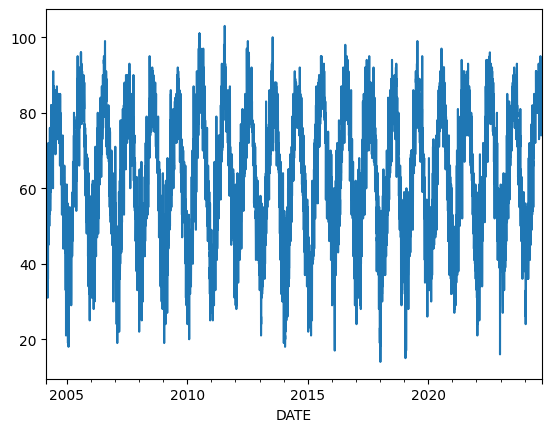

In [42]:
weather['TMAX'].plot()

<Axes: xlabel='DATE'>

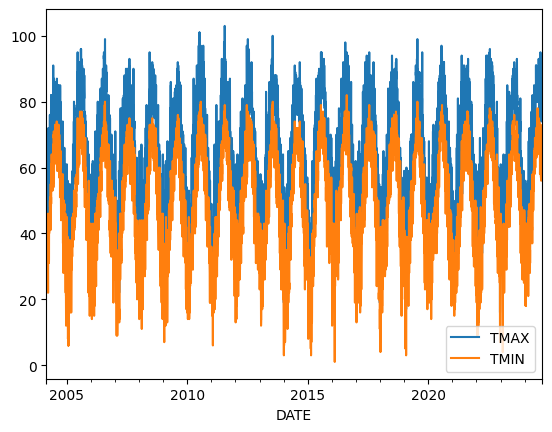

In [52]:
weather[['TMAX','TMIN']].plot()



In [56]:
weather['TARGET']= weather.shift(-1)['TMAX']
weather.drop(columns=['target'],inplace=True)
weather

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,TARGET
DATE,,,,,,,,,,,,,
2004-02-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",21.03,0.00,0.0,0.0,45.0,34.0,310.0,290.0,31.1,40.9,47.0
2004-02-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.72,0.00,0.0,0.0,47.0,29.0,310.0,320.0,17.0,19.9,37.0
2004-02-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.16,0.01,0.1,0.0,37.0,29.0,350.0,360.0,16.1,19.9,42.0
2004-02-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",14.54,0.00,0.0,0.0,42.0,22.0,350.0,350.0,25.9,32.0,44.0
2004-02-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",11.41,0.00,0.0,0.0,44.0,26.0,350.0,360.0,17.9,21.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",9.17,0.00,0.0,0.0,80.0,67.0,20.0,50.0,15.0,21.0,87.0
2024-09-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.96,0.00,0.0,0.0,87.0,69.0,30.0,20.0,19.9,27.1,84.0
2024-09-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.20,0.00,0.0,0.0,84.0,67.0,350.0,20.0,21.0,32.0,81.0


In [57]:
# WANT TO REARRANGE THE COLUMNS TO MAKE TARGET NEXT TO TMIN
cols = list(weather.columns)
target_index = cols.index('TARGET')  # Get the current index of 'TARGET'
tmin_index = cols.index('TMIN')  # Get the index of 'TMIN'
# Move 'TARGET' after 'TMIN'
cols.insert(tmin_index + 1, cols.pop(target_index))
weather = weather[cols] # Reorder columns
weather

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,TARGET,WDF2,WDF5,WSF2,WSF5
DATE,,,,,,,,,,,,,
2004-02-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",21.03,0.00,0.0,0.0,45.0,34.0,47.0,310.0,290.0,31.1,40.9
2004-02-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.72,0.00,0.0,0.0,47.0,29.0,37.0,310.0,320.0,17.0,19.9
2004-02-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.16,0.01,0.1,0.0,37.0,29.0,42.0,350.0,360.0,16.1,19.9
2004-02-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",14.54,0.00,0.0,0.0,42.0,22.0,44.0,350.0,350.0,25.9,32.0
2004-02-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",11.41,0.00,0.0,0.0,44.0,26.0,45.0,350.0,360.0,17.9,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",9.17,0.00,0.0,0.0,80.0,67.0,87.0,20.0,50.0,15.0,21.0
2024-09-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.96,0.00,0.0,0.0,87.0,69.0,84.0,30.0,20.0,19.9,27.1
2024-09-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.20,0.00,0.0,0.0,84.0,67.0,81.0,350.0,20.0,21.0,32.0


In [59]:
weather.isnull().sum()

,0
STATION,0
NAME,0
AWND,0
PRCP,0
SNOW,0
SNWD,0
TMAX,0
TMIN,0
TARGET,1
WDF2,0


In [60]:
# Here we spotted a NULL value in the new column thus need to address it
weather = weather.ffill()
weather.isnull().sum()
# DONE

,0
STATION,0
NAME,0
AWND,0
PRCP,0
SNOW,0
SNWD,0
TMAX,0
TMIN,0
TARGET,0
WDF2,0


NOW TRAINING THE MACHINE LEARNING MODEL


In [63]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.1)

In [65]:
predictors = weather.columns[~weather.columns.isin(['TARGET','NAME','STATION'])]
predictors

Index(['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2',
       'WSF5'],
      dtype='object')

In [69]:
#here we need to ensure that we predict the future values from the past values
def backtest(weather , model , predictors , start=1825 ,step=90):
  all_predictions = []

  for i in range(start , weather.shape[0] ,step):
    train = weather.iloc[:i,:]  #these are the rows one we need to predict
    test = weather.iloc[i:(i+step),:]  #the predictors we will use to predict using step as 90 days

    model.fit(train[predictors], train['TARGET'])

    preds = model.predict(test[predictors])

    preds = pd.Series(preds , index=test.index)
    combined = pd.concat([test['TARGET'],preds],axis=1)

    combined.columns = ['actual','prediction']

    combined['diff'] = (combined['actual'] - combined['prediction']).abs()

    all_predictions.append(combined)

  return pd.concat(all_predictions)


MAKING PREDICTIONS

In [71]:
predictions = backtest(weather , rr , predictors)
predictions

,actual,prediction,diff
DATE,,,
2009-02-20,41.0,34.483096,6.516904
2009-02-21,45.0,41.456456,3.543544
2009-02-22,36.0,43.708569,7.708569
2009-02-23,38.0,35.612009,2.387991
2009-02-24,38.0,36.617860,1.382140
...,...,...,...
2024-09-18,87.0,81.725591,5.274409
2024-09-19,84.0,85.187555,1.187555
2024-09-20,81.0,81.031798,0.031798


In [74]:
!pip install scikit-learn #install the package with mean_absolute_error function

In [76]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions['actual'] , predictions['prediction'])


4.971226384650669

In [77]:
# another method

predictions['diff'].mean()


4.971226384650669

In [78]:
def pct_diff(old , new):
  return (new-old)/old

def compute_rolling(weather , horizon , col):
  label = f"rolling_{horizon}_{col}"

  weather[label] = weather[col].rolling(horizon).mean()
  weather[f"{label}_pct"] = pct_diff(weather[label] , weather[col])

  return weather

rolling_horizons=[3,14]

for horizon in rolling_horizons:
  for col in ['TMAX','TMIN','PRCP']:
    weather = compute_rolling(weather , horizon , col)